In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("DATASET-balanced 1.csv")
target = df["LABEL"]
train = df.drop("LABEL", axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20, random_state=0)

In [3]:
model_1 = RandomForestClassifier()
model_2 = DecisionTreeClassifier()
model_3 = KNeighborsClassifier()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
pred_final = np.round((pred_1 + pred_2 + pred_3) / 3.0)

In [5]:
accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)
print(f"Accuracy: {accuracy}%")
print(f"AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Accuracy: 97.071%
AUC score: 0.971
Precision: 0.974
Recall: 0.97
F1-score: 0.972
MCC: 0.941
Mean Squared Error (MSE): 0.029
Mean Absolute Error (MAE): 0.029


In [ ]:
# Calculate log loss for each model
log_losses = [-log_loss(y_test, model.predict(X_test)) for model in [model_1, model_2, model_3, model_4, model_5]]

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), log_losses, marker='o')
plt.title('Loss Curve for Individual Models')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
# Calculate log loss for the ensemble model
ensemble_log_loss = -log_loss(y_test, pred_final)

# Plot the loss graph
plt.figure(figsize=(6, 4))
plt.bar(['Ensemble'], [ensemble_log_loss], color='skyblue')
plt.title('Log Loss for Ensemble Model')
plt.ylabel('Log Loss')
plt.show()

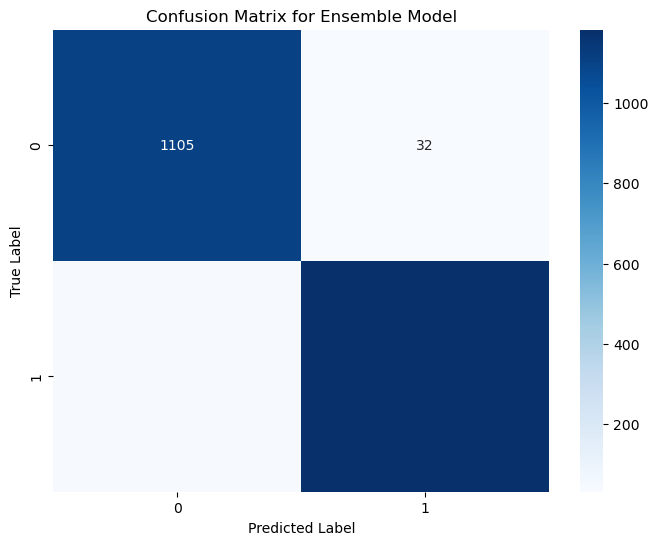

In [6]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix for the ensemble predictions
conf_matrix = confusion_matrix(y_test, pred_final)

# Plot the heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.matshow(np.vstack([y_test, pred_final]).T, cmap="YlGnBu")
ax.set_xticks(np.arange(len(y_test)))
ax.set_yticks([0, 1])
ax.set_xlabel("Test samples")
ax.set_ylabel("Class")
ax.set_title("Heatmap of Individual vs. Ensemble Predictions")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrices and plot heat maps for each individual model
for i, model in enumerate([model_1, model_2, model_3, model_4, model_5]):
    pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, pred)

    # Plot the heat map for each individual model
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for Model {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Calculate log loss for each individual model
log_losses = [-log_loss(y_test, model.predict(X_test)) for model in [model_1, model_2, model_3, model_4, model_5]]

# Plot the loss graph for individual models
plt.figure(figsize=(8, 5))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], log_losses, color='skyblue')
plt.title('Log Loss for Individual Models')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.show()

In [ ]:
# Calculate log loss for each individual model
log_losses = [-log_loss(y_test, model.predict(X_test)) for model in [model_1, model_2, model_3, model_4, model_5]]

# Plot the loss curve for individual models
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), log_losses, marker='o')
plt.title('Loss Curve for Individual Models')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.xticks(range(1, 6))
plt.show()